#### sklearn.linear_model.Ridge
* _class_ sklearn.linear_model.Ridge(_alpha=1.0_,  _*_,  _fit_intercept=True_,  _copy_X=True_,  _max_iter=None_,  _tol=0.0001_,  _solver='auto'_,  _positive=False_,  _random_state=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_ridge.py#L921)[](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge "Permalink to this definition")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

boston = pd.read_csv("../ml/datasets/Boston.csv",index_col=0)
label = boston["medv"]
feature = boston.drop(columns= "medv", axis=1)


#릿지 클래스 
ridge = Ridge(alpha=10)
neg_mse_ridge_score = cross_val_score(ridge, feature, label, scoring="neg_mean_squared_error", cv=5)
rmse_score = np.sqrt(-1 * neg_mse_ridge_score)
avg_rmse = np.mean(rmse_score)
print(neg_mse_ridge_score, rmse_score, avg_rmse)

# alpha값을 0,0.1,1,10,100으로 변경하면서 RMSE값 측정

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_ridge_score = cross_val_score(ridge, feature, label, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_ridge_score))
    print(avg_rmse)
    
from sklearn.linear_model import LinearRegression
li_reg = LinearRegression()
neg_mse_li_reg_score = cross_val_score(li_reg, feature, label, scoring="neg_mean_squared_error", cv=5)

avg_rmse_li_reg = np.mean(np.sqrt(-1 * neg_mse_li_reg_score))
avg_rmse_li_reg

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
neg_mse_lasso_score = cross_val_score(lasso, feature, label, scoring="neg_mean_squared_error", cv=5)
avg_rmse_lasso = np.mean(np.sqrt(-1 * neg_mse_lasso_score))
print('5 fold 의 개별 negtivate mse scores:',np.round(neg_mse_lasso_score,3))
print('5 fold 의 개별 rmse scors: ', np.round(rmse_score,3))
print('5 fold의 평균 rmse:{0:.3f}'.format(avg_rmse))

[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218] [3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ] 5.518166280868973
5.828658946215807
5.788486627032413
5.652570965613547
5.518166280868973
5.329589628472148
5 fold 의 개별 negtivate mse scores: [-27.786 -46.397 -80.323 -61.56  -16.302]
5 fold 의 개별 rmse scors:  [3.38  4.929 5.305 8.637 5.34 ]
5 fold의 평균 rmse:5.330


In [ ]:
# ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1, 10 ,100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha =alpha)
    
    #cross_val_score을 이용해 5fold평균 rmse 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
    avg_rmse= np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일때 5 fold 의 평균 rmse:{1:.3f}]'.format(alpha,avg_rmse))

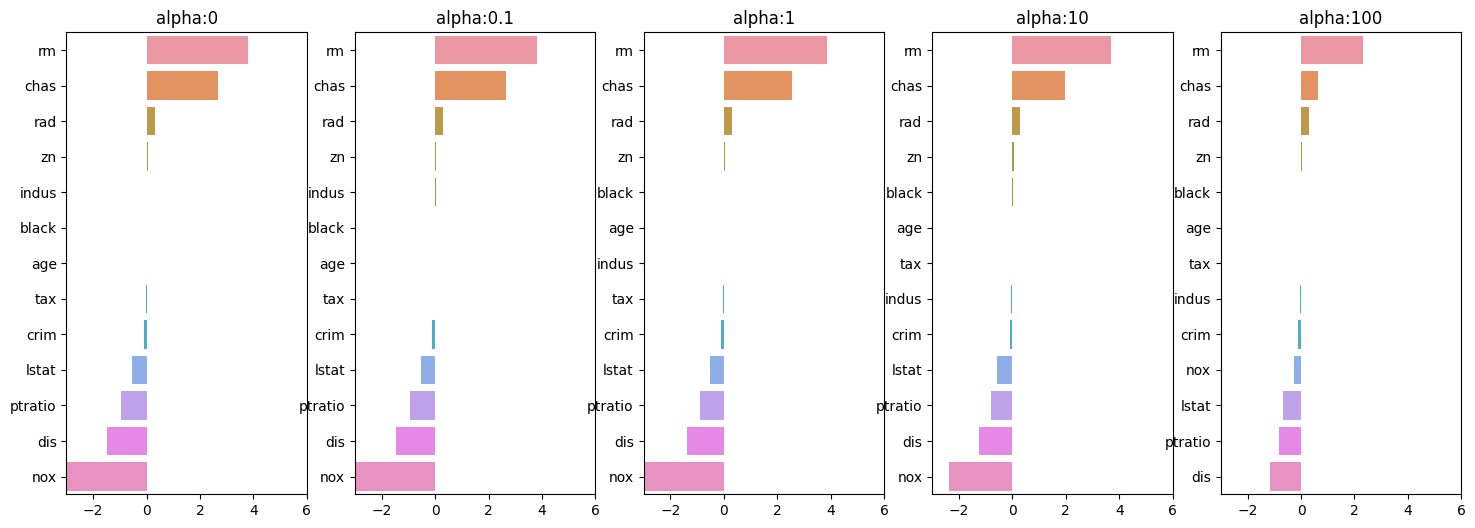

In [9]:
alphas = [0 , 0.1 , 1, 10 ,100]
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()
X_data = feature
y_target = label

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

C:\Users\신민경\AppData\Local\Temp\ipykernel_17792\2042834920.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_data,y_target)
c:\users\신민경\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\users\신민경\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.539e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

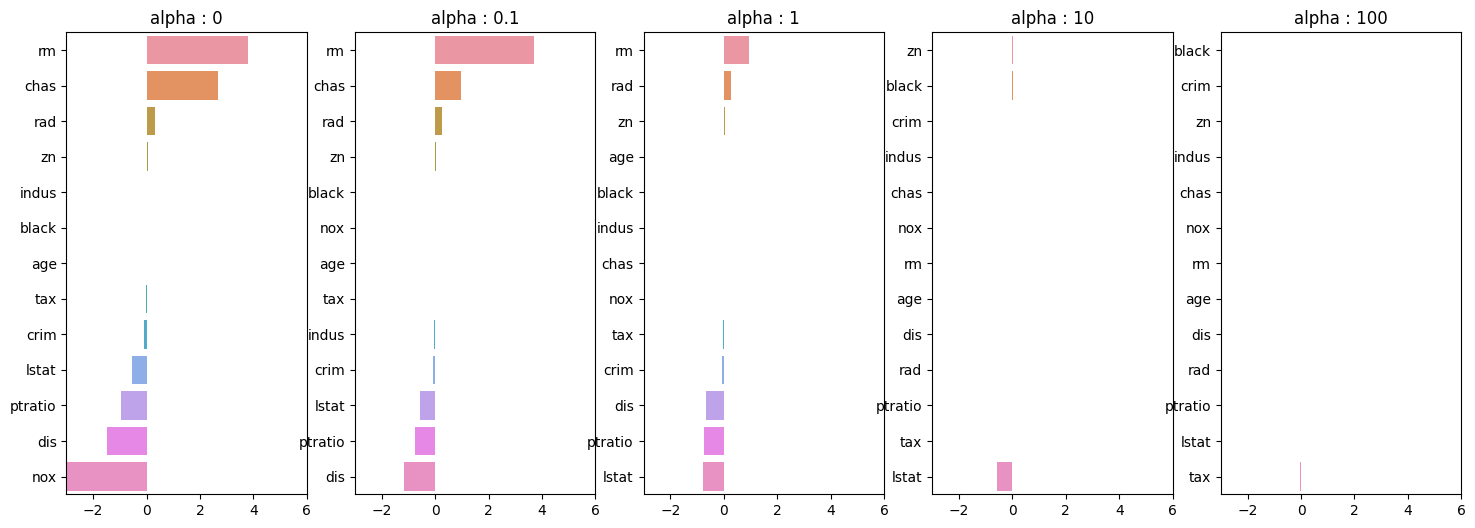

In [17]:
fig, axs = plt.subplots(figsize = (18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()


for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_data,y_target)
    coeff = pd.Series(data=lasso.coef_, index= feature.columns)
    colname = "alpha : " + str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
    
plt.show()

L2 규제 vs L1 규제
L2의 경우에는 가중치의 값을 이용합니다. 어느 정도 튀는 값에 대해 대응할 수 있다는 소리죠. 따라서, 이상치나 노이즈가
있는 데이터에 대한 학습을 진행할 때 사용하면 좋습니다. 특히 선형 모델의 일반화에 좋습니다.
-> L2규제는 회귀 계수 값의 증감을 관리한다.
L1의 경우에는 가중치의 크기에 상관없이 상수값을 뺍니다. 이는 대체적으로 불필요한 가중치의 수치를
0으로 만들도록 하는 방향으로 적용됩니다.
즉, 중요한 가중치만을 취하기 때문에 sparse feature에 대한 모델을 구성하는데

In [23]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [24]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 추출
lasso_alphas =[0.07, 0.1, 0.5, 1 ,3]
coeff_lasso_df= get_linear_reg_eval('Lasso',params = lasso_alphas, X_data_n = X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 
